In [ ]:
!pip install --upgrade networkx

In [1]:
from IPython.core.display import HTML
from datascience import *
import itertools
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

import networkx as nx
%matplotlib inline

#np.random.seed(99)

In [2]:
#Loading testing data
from client.api.notebook import Notebook 
hw03 = Notebook('hw03.ok')
_ = hw03.auth(inline=True)

Assignment: Demography180 Homework 03
OK, version v1.13.11



ERROR  | auth.py:91 | {'error': 'invalid_grant'}



Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: j6zGvT4uji1Vc27EzBb6682GIbCXZj
Successfully logged in as ruijie_zhong@berkeley.edu


# HW 03

In this HW, we are going to calculate the average clustering coefficient of a network based on the concepts we have discussed in the lectures and labs.
Starting from a small hand-crafted network, we are eventually going to analyze a complete network data from the [Add Health project](http://www.cpc.unc.edu/projects/addhealth).

## Clustering Coefficient

**Clustering Coefficient ** of a node can be defined as the fraction of the number of pairs of neighbors of a node that are directly connected to each other.

Consider the network created by the following code.

/Users/Mia/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


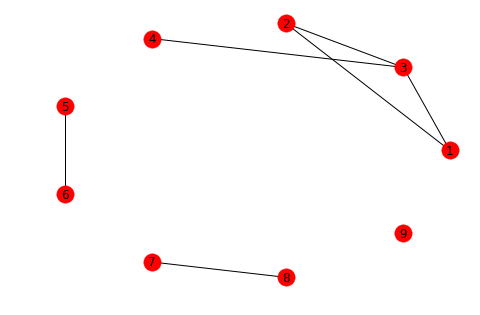

In [3]:
ex_network = nx.Graph([(1,3), (2,3), (1,2), (3,4), (5,6), (7,8)])
ex_network.add_node(9)
nx.draw_circular(ex_network, with_labels=True)

### 1) Calculating average clustering coefficient by hand

**Practice** For each node in the above graph, calculate the following things:

* Degree of the node, 
* Number of pairs of neighbors of the node,
* Number of the pairs of neighbors that are directly connected with each other

Write down your answer as a table with the following columns:

NodeId, Degree of the node, Number of pairs of neighbors, Number of the pairs of the neighbors that are directly connected

* Write down this table as comma seperated and begin each line with a #

In [ ]:
# NodeId, Degree of the node, Number of pairs of neighbors, Number of the pairs of the neighbors that are directly connected
# 1,2,1,1
# 2,2,1,1
# 3,3,3,1
# 4,1,0,0
# 5,1,0,0
# 6,1,0,0
# 7,1,0,0
# 8,1,0,0
# 9,0,0,0

The clustering coefficient of each node is the proportion of number of the pairs of the neighbors that are directly connected to the number of all possible pairs of the neighbors. Check the lecture slide and demo for review.

**Practice** For each of the node in the above mentiond graph, calculate the clustering coefficient for each node. 

Here we list the clustering coefficient in the following table with two columns: NodeId, Clustering Coefficient

In [ ]:
# NodeId, Clustering Coefficient
# 1,1
# 2,1
# 3,0.333
# 4,0
# 5,0
# 6,0
# 7,0
# 8,0
# 9,0

** Question ** Calculate the average clustering coefficient for the whole graph.

In [4]:
# Write solution here
q1 = (1+1+0.333)/9

In [5]:
_ = hw03.grade('q1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### 2) Calculating average clustering coefficient using the function in networkx module

Networkx library provides functions to calculate the average clustering coefficient of a graph. To be specific,
`average_clustering` method can be used to calculate the average clustering coefficient of a graph. Use the average_clustering method to calculate the average clustering coefficient of the above graph.  

The average clustering coefficient calculated by this function should be the same with your answer calculated by hand for q4. (There can be some minor difference if you are rounding off your answer.)

In [ ]:
nx.average_clustering(ex_network)

### 3) Create a function to calculating clustering coefficient from scratch

In this part of this homework, we are going to write down a method to calculate the average clustering coefficient of a network from scratch.

**Algorithm** Algorithm for calculating the clustering coefficient of ONE node is as follows.

1. Get all the neighboring nodes for the node x
2. Get all the possible pairs for the neighboring nodes of x
3. For each of the pair created in the last step, count the number of pairs that are directly connected to each other
4. Divide the number of pairs that are directly connected (Step 3) by the total number of pairs

Many of the methods in the networkx library return an iterator. The concept of iterators is beyond the scope of this course and homework but two things to remember is that the iterators are as follows:

1. Iterators can be used in for loops just like any other container. In other words, iterators can be used in for loop as follows
<code> for x in iterator </code>
2. Iterators can be easily converted into lists by using list comprehension as follows
<code> [x for x in iterator] </code>

** Practice ** Step 1: Let us suppose that we are interested in getting the neighbors of a node. We can use the neighbors function which is a member of the graph class in networkx for the purpose. Complete the following function.

In [ ]:
def get_neighbors(graph_instance, node_id): # two inputs: the network as a graph object, and the id of the node
    ''' Get all the neighbors of node_id in graph_instance as a list'''
    neighbors_iter=graph_instance.neighbors(node_id) # Use the .neighbor function of the graph object that results an iterator for the neighbors
    neighbors_list=[neighbor for neighbor in neighbors_iter] # Covert the iterator into a list (easier to work with)
    return neighbors_list

In [ ]:
# Now we can get the neighbors of node 3
neighbor_n3 = get_neighbors(ex_network, 3)
neighbor_n3

** Practice ** Step 2: Now that we have the list of neighbors for node with id 3. The next step is to convert the list of neighbors into list of possible pair of neighbors. We are going to use the combinations functions of the builtin itertools library for the purpose. 

Note that the itertools.combinations function returns an iterator and for the easy of understanding, we are going to convert this iterator into a list as discussed earlier in this homework as well.

In [ ]:
# example usage of itertools.combinations
# you get a interator of all the possible combinations of 2 elements from the [1,2,3] array
[x for x in itertools.combinations([1,2,3],2)]

In [ ]:
# now let's define a function that returns all the possible pairs of neighbors of one node.
def get_neighbors_pairs(neighbors_list): # this function should apply to the returned neighbor list from the function get_neighbors
    lst= [x for x in itertools.combinations(neighbors_list,2)]
    return lst

In [ ]:
# you can have all the possible pairs between node 1, 2, and 4, who are node 3's neighbors
allpairs_n3 = get_neighbors_pairs(neighbor_n3)
allpairs_n3 

** Practice ** Step 3: In the next step, we are required to count the number of pairs that are directly connected with each other. We are going to use the neighbors function from the Graph class.

In [ ]:
def count_connected_neighbors(graph_instance,neighbors_pairs ):
    count=0 # we prepare a count 0, and add 1 to it when we have a connected pair of neighbors
    for x, y in neighbors_pairs: 
        if x in graph_instance.neighbors(y): # If two nodes x and y are directly connected with each other in graph g, 
                                             # then x will be in the neighbors of y and vice versa.
            count+=1
    return count

In [ ]:
connected_count_n3=count_connected_neighbors(ex_network,allpairs_n3)
connected_count_n3

** Question ** Step 4: As the last step in the algorithm, we are going to calculate the clustering coefficient of the node 3.

In [ ]:
def get_clustering_coeff(allpairs, connected_neighbors_count): # 2 inputs: the list of all possible pairs
                                                               #           the count of connected neighbors
    n_allpairs=len(allpairs)
    if n_allpairs!=0:
        cc=float(connected_neighbors_count)/n_allpairs
    else:
        cc=0
    return cc

In [ ]:
# apply this function and get the clustering coefficient of node 3
q2 = ...

In [ ]:
_ = hw03.grade('q2')

**Question** Now that we have all the functions to compute the clustering coefficient, we are going to write a function to internally call all of these steps. Complete the following code.

In [ ]:
def get_cc_node(graph_instance, node_id):
    '''return the clustering coefficient of the node_id in the graph_instance'''
    neighbors=... # Hint: Use one of the functions defined in the previous questions
    
    pairs= ... # Hint: Use one of the functions defined in the previous questions
    
    connected_count = ... # Hint: Use one of the functions defined in the previous questions
    
    cc=... # Hint: Use one of the functions defined in the previous questions
    
    return cc

In [ ]:
# the clustering coefficient for node 3 (this value should be the same as the previous calculation)
q3 = get_cc_node(ex_network, 3)
q3

In [ ]:
_ = hw03.grade('q3')

**Question** Now that we have a the function to calculate the clustering coefficient of a single node in a graph, our next step is to calculate the average clustering coefficient of all the nodes in a graph.

This can be done by:

1. Calculating the clustering coefficient for all the nodes in a graph and saving it in an array
2. Calculating the mean of the array 

Complete the following function to calculate the average clustering coefficient of all the nodes in a graph.

In [ ]:
def get_average_cc(graph_instance):
    
    cc_array=make_array() # begin with an empty array and then append new results to it
    
    for node in ...:
        cc=...
        cc_array=np.append(cc_array,cc)
    
    return np.mean(cc_array)

In [ ]:
q4 = get_average_cc(ex_network)
q4

In [ ]:
_ = hw03.grade('q4')

Note that the average clustering created by your function q4 should be equal to the average clustering coefficient calculated by hand in q1.

In [ ]:
round(q1,3)==round(q4,3)

### Add Health network

As the next step in this homework, we are going to calculate the average clustering coeffcieint for all the networks in the Add Health study.

In [ ]:
def read_add_health_network(network_id):
    """
    network_id : integer from 1 to 84
    
    read in the Add Health network corresponding to the given id number and
    return it as an undirected networkx object
    """

    # this file was downloaded from
    # http://moreno.ss.uci.edu/data.html#adhealth
    edge_file = os.path.join("data", "comm" + str(network_id) + ".dat")
    with open(edge_file, 'r') as f:
        edge_lines = f.readlines()
        
    network = nx.parse_edgelist(edge_lines, nodetype=int, data=[('activity_level', float)])
    
    # note that we call the to_undirected method to ensure we get an undirected network
    return(network.to_undirected())

Now let's use this function to actually read in all 84 of the Add Health school networks:

In [ ]:
number_add_health_networks = 84
add_health_networks = [read_add_health_network(x) for x in range(1,number_add_health_networks+1)]
# Running this cell will take a few seconds
# now add_health_networks is an object containing 84 networks

** Question **First, we are going to calculate the average clustering coefficient for **the first network** in the health networks study.

In [ ]:
g=add_health_networks... # assign the first network in add_health_networks to 'g', use the index correctly

cc_nx=nx.average_clustering(..) # we use the average clustering coefficient function to do the calculation

print ('Average clustering coefficient calculated by the networkx library', cc_nx)

cc_custom=get_average_cc(..) # we use the customized function to do the calculation

print ('Average clustering coefficient calculated by our custom function', cc_custom)

In [ ]:
_ = hw03.grade('q5')

### Calculating clustering coefficient for all of the Add Health communities

**Question** Let's start by making a dataset that has the clustering coefficient in each of the 84 Add Health community networks. Fill in the missing code below:

In [ ]:
cc_ah = make_array()

for g in ...:
    cc_ah = np.append(..., ...) # np.append will append the new results to the end of original array
                                # np.append(the original array, the new element), check np.append? for more info
                                # we want to make an array of all the clustering coefficients for all the 84 networks

add_health_df = Table().with_columns([  # here we want to make a table for these coefficients
     'id', np.arange(1, number_add_health_networks+1), # the first column has the ids of the nodes
     'clustering_coeff', ...                           # the second column has the clustering coefficient
    ])

add_health_df # take a look at the new table with all the CCs, running this cell might take a couple of seconds

In [ ]:
_ = hw03.grade('q6')

**Question** Make a histogram that shows the distribution of the clustering coefficient for the Add Health communities (don't include `id`).

In [ ]:
# Write your code here

# Hand-writing questions

Consider the network shown in Figure below: there is an edge between each pair of nodes, with five of the edges corresponding to positive relationships, and the other five of the edges corresponding to negative relationships.
<img src="5_18.png" width="240" height="160" align="center"/>
<br>
Each edge in this network participates in three triangles: one formed by each of the additional nodes who is not already an endpoint of the edge. (For example, the A-B edge participates in a triangle on A, B, and C, a triangle on A, B, and D, and a
triangle on A, B, and E. We can list triangles for the other edges in a similar way.) 

** Question 1 ** For each edge, how many of the triangles it participates in are balanced, and how many are unbalanced? Please list in the following box.

(Notice that because of the symmetry of the network, the answer will be the same for each positive edge, and also for each negative edge; so it is enough to consider this for one of the positive edges and one of the negative edges.)

** Example **
Edge (AB) participates in three triangles: (AB,BC,AC) is unbalanced, (AB,AD,BD) is unbalanced, (AB,BE,AE) is balanced <br>

<div class='response'>
[Answer here]
</div>

** Question 2 ** In the social network depicted in the following figure, with each edge labeled as either a strong or weak tie, which nodes satisfy the Strong Triadic Closure Property, and which do not? Provide an explanation for your answer.

<img src="3_22.png" width="360" height="240" align="center"/>
<br>

<div class='response'>
[Answer here]
</div>

### Rerun the tests and submit your lab

In [ ]:
import os
print("Running all tests...")
_ = [hw03.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

In order to submit your assignment, run the next cell.

You can submit as many times as you want (up to the deadline Thursday, Feb 21th, at 9 pm).

In [ ]:
_ = hw03.submit()